In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 4.2. Разбиение выборки

Как разбить выборку
*сomplete CV* — полный скользящий контроль
В данном случае оценка строится по всем возможным разбиениям. Важно упомянуть этот метод, однако стоит понимать, что даже при малых размерах длины обучающей выборки число выборки очень большое, и это затрудняет практическое применение данного метода. Полный скользящий контроль используют в теоретических исследованиях или в тех случаях (довольно редких), когда удается вывести вычислительную формулу, позволяющую реализовать вычисления.

К примеру, для метода k ближайших соседней такая формула известна, об этом можно почитать тут. Но все же этот метод разбиения используется на практике крайне редко.

*hold-out* — отложенная выборка
Разбиваем выборку на обучающую, валидационную и, по желанию, на тестовую выборки. Обычно в соотношении 60/40 или 70/30, вместе с тестовой — 60/20/20 или 70/15/15.

Данный метод чаще всего применяется в случае больших датасетов в силу того, что требует значительно меньше вычислительных мощностей, чем другие методы.

Однако важно помнить, что оценка в этом методе сильно зависит от разбиения. Это плохо, так как оценка должна в первую очередь характеризовать сам алгоритм обучения, а не способ разбиения.

*k-fold* — cross-validation, перекрёстная валидация
Разбиваем выборку на k частей.
Повторяем k раз: обучаем на k-1 частях, валидируем на оставшейся части.
Усредняем значения метрики.
Позволяет сделать оценку качества более робастной — устойчивой к помехам.
Чаще всего k имеет значение 10 (или 5 в случае маленьких выборок).

*t×k-fold* кросс-валидация

Процедура выполняется t раз. Обучающая выборка случайным образом разбивается на k непересекающихся, одинаковых по объему частей. Производится k итераций. На каждой итерации происходит k-fold-разбиение.

По сути, такой тип валидации — это k-fold валидация, которая повторяется t раз. Такой способ контроля обладает всеми преимуществами k-fold-валидации, но при этом добавляется возможность увеличивать число разбиений.

*leave-one-out* — отложенный пример
Предельный случай k-fold, при котором k равняется размеру всей выборки:

Выбираем пример для валидации, обучаем на всех остальных.
Выбираем пример для валидации, который ещё не видели, возвращаемся в пункт 1.
Частный случай leave-P-out, при котором нужно перебрать все способы выбора P-элементов из выборки.  Большим недостатком данного метода является то, что он очень ресурсозатратен. Однако нельзя утверждать, что он вообще не используется. В некоторых методах обучения вычисление LOO получается заметно ускорить, и его использование становится возможным.

Для кросс-валидации также есть специальные функции. Например, ниже пример k-fold c двумя разбиениями на двух фолдах:

In [11]:
from sklearn.model_selection import KFold
X = np.array([[1,2],[3,4],[5,6],[7,8]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2) # реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиени

<generator object _BaseKFold.split at 0x000001CF20CA5DD0>

In [12]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [13]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## 4.3. Практика

### 1.1 TRAIN_VALID HOLD OUT

In [2]:
from sklearn.datasets import load_iris

In [32]:
data = load_iris()
df = pd.DataFrame(data = data['data'],columns=data['feature_names'])
df['class'] = data['target']

In [34]:
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
100,6.3,3.3,6.0,2.5,2
80,5.5,2.4,3.8,1.1,1
1,4.9,3.0,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0


In [39]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(df, test_size=.15, shuffle=True)
print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(df.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [42]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

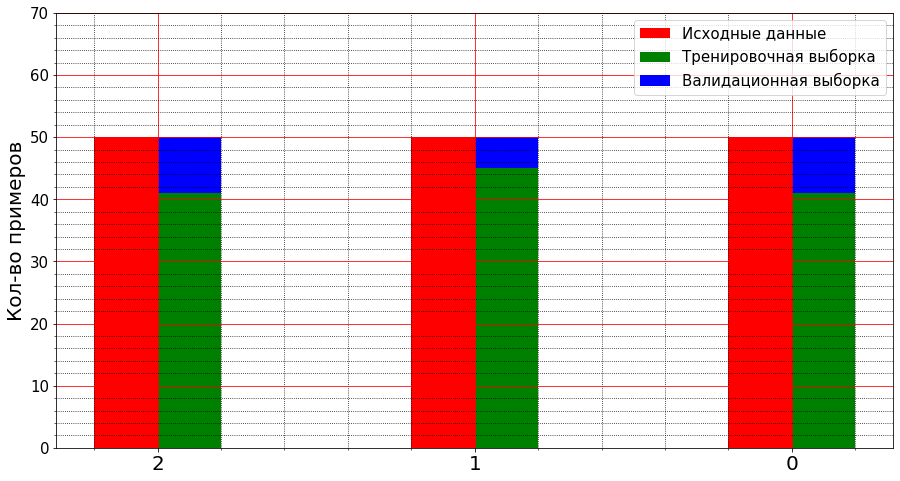

In [43]:
visualize_train_valid_counts(df,train,valid)

По bar chart выше видно, что количество примеров каждого класса в тренировочной (или валидационной) выборке не совпадает. Это происходит потому, что мы разбили выборку без учета долей классов. Принцип, при котором данные разбиваются с учетом долей классов, называется **stratified** разбиение (стратифицированное разбиение).  
Для того чтобы сделать стратифицированное разбиение воспользуемся методом [StratifiedShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) из библиотеки scikit-learn:

#### StratifiedShuffleSplit

Проблема решается с помощью stratified разбиения или стратифицированного разбиения. В библиотеке sklearn есть нужный нам класс **StratifiedShuffleSplit**

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

SSS = StratifiedShuffleSplit(n_splits=1, test_size=.15)
train_indices, valid_indices = [split for split in SSS.split(df.iloc[:, :4], df.iloc[:, 4])][0]
s_train = df.iloc[train_indices]
s_valid = df.iloc[valid_indices]

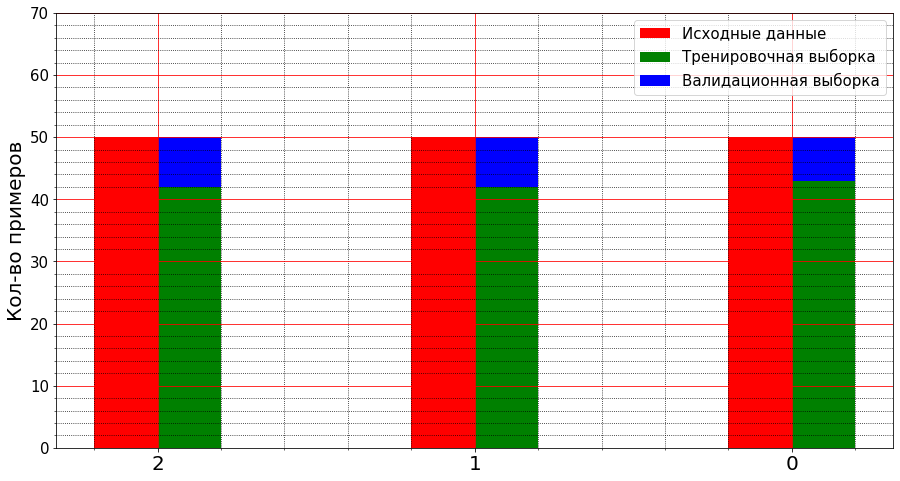

In [46]:
visualize_train_valid_counts(df,s_train,s_valid)

### 1.2 TRAIN_VALID_TEST

In [47]:
valid_frac = .15
test_frac = .15

#number of examples we want to get
valid_count = int(valid_frac * df.shape[0])
test_count = int(test_frac * df.shape[0])

train, valid_test = train_test_split(df, test_size=(valid_count + test_count))

valid,test = train_test_split(valid_test,test_size= test_count)

In [53]:
print(
    'Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}\n\
Размер test выборки{}'
    .format(df.shape, train.shape, valid.shape, test.shape))

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (106, 5)
Размер валидационной выборки: (22, 5)
Размер test выборки(22, 5)


### K-FOLD

In [55]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(df):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

### Leave-one-out

In [57]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(df[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


Leave-one-out разбиение это частный случай [Leave-P-out](https://en.wikipedia.org/wiki/Cross-validation_(statistics%29) разбиения, при котором составляются комбинации из $p$ примеров исходных данных. Количество всевозможных комбинаций при таком разбиении составляет $C^p_n$ (или$\binom{n}{p}$), что вынуждает отказаться от использования этого метода при средних и больших объемах данных.  
В `sklearn` метод находится здесь: `sklearn.model_selection.LeavePOut`

### Задание 4.3.1

Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [58]:
vis_data = pd.read_csv("./train1.csv", encoding = 'ISO-8859-1', low_memory = False)

In [59]:
vis_data.sample(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
82351,107085,"Buildings, Safety Engineering & Env Department","Doetsch, James","RANCE, RONALD",32.0,NEVADA,NaN,2822.0,GERMAN,SAGINAW,...,0.0,360.0,0.0,360.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
190251,222474,"Buildings, Safety Engineering & Env Department","O'Neal, Claude","DESERINE, BARBER",2608.0,JOSEPH CAMPAU,NaN,2632.0,JOS CAMPAU,DETROIT,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
173096,203399,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","FANROY, KEVIN",15356.0,PATTON,NaN,2199.0,WESTHAMPTON,SOUTHFILED,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
167311,198945,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MACK, IRENE",21435.0,KARL,NaN,1927.0,P.O. BOX,DETROIT,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
162787,192041,Department of Public Works,"Lewis, Velinda","SMITH, MICHAEL",19403.0,ST AUBIN,NaN,1943.0,ST AUBIN,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [73]:
X_train, X_test = train_test_split(vis_data,test_size=.3, shuffle=False)

In [74]:
result = X_test['payment_amount'].mean()

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
mse = mean_squared_error(y_true, y_pred)

In [80]:
rmse = np.sqrt(mse)

In [81]:
rmse

5.746042116100439

# Метрики качества регрессии

In [5]:
data = load_iris()
iris_data = pd.DataFrame(data = data['data'],columns=data['feature_names'])
iris_data['class'] = data['target']

Поговорим о метриках качества, самая базовая из которых — функция ошибки Loss function. Посчитаем значение ошибки для случайно предсказанных классов. Нашим алгоритмом будет монетка с тремя гранями, которая пытается угадать класс ириса.

In [3]:
# Функция, выбирающая один класс из заданного кол-ва классов

def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

In [ ]:
# Определить количество примеров, классов и сформировать словарь 
# для конвертирования имени класса в порядковое число

In [7]:
# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

20.032490310668944

В результате мы получили 20.03. Что это значит? Наверняка сказать нельзя, потому что функции ошибки не всегда читаются напрямую. Они имеют смысл при сравнении: при хорошей сходимости алгоритма ошибка должна падать после очередной итерации обучения.

Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации. Для подсчёта метрик возьмём искусственную задачу, где определим истинные классы следующим образом:


Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации. Для подсчёта метрик возьмём искусственную задачу, где определим истинные классы следующим образом:

In [13]:
n = 100 # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats
# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


Первая метрика, которую мы посмотрим — Accuracy или точность, самая базовая и простая. Посчитаем метрику:

In [19]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0 ) & (y_pred == 0))
    acc = (TP+TN)/(P+N)
    return acc, TP, TN, P,N

Возьмем предсказания двугранной монетки для нашей выборки:

In [27]:
y_pred = np.array([monetka(2) for _ in range(n)])

Посчитаем значение accuracy:

In [28]:
acc, TP, TN, P,N = calc_accuracy(y_true,y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 5
TN = 49
P = 8
N = 92
acc = 54.0%


То же самое можно сделать с помощью функции [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) библиотеки scikit-learn:

In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print('Accuracy from scikit-learn: {}%'.format(acc * 100))

Accuracy from scikit-learn: 54.0%


Наш алгоритм работает с точностью 50% (может отличаться от запуска к запуску). Совсем неплохо для случайной монетки. Но давайте попробуем улучшить результат. Мы же знаем, что наша выборка приблизительно на 90% состоит из примеров отрицательного класса. Тогда пусть наша монетка будет однобокой и всегда будет выдавать 0 в качестве ответа:

In [30]:
y_pred = np.zeros(n)

In [31]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 0
TN = 92
P = 8
N = 92
acc = 92.0%


90%! Монетка стала предсказывать еще лучше.  
На самом деле монетка предсказывает только один класс, абсолютно игнорируя второй. В этом и есть главная проблема метрики accuracy: если выборка содержит разное количество примеров каждого класса, то добиться высокой точности можно даже просто не предсказывая редкие классы.  
Для таких несбалансированных выборок accuracy не может являться ключевой метрикой. Далее мы рассмотрим метрики, с помощью которых можно избежать дизбаланса классов, такие как precision, recall и F1-score.

## 2.3. precision и recall

**precision** — метрика, измеряющая, насколько много из принятых моделью положительных объектов в действительности являются положительными.  
**recall** — метрика, измеряющая, насколько много положительных объектов из всех положительных объектов модель выбрала.

$$
precision = \frac{TP}{TP+FP} \quad recall = \frac{TP}{TP+FN}
$$

Интересный факт про обе метрики заключается в том, что при возрастании одной общей тенденцией второй является падение. В некотором смысле они противоположны. Это отражает следующий пример графика:
<img src="https://miro.medium.com/max/875/0*XEO3pwAee7tBT_D1.png" width="400px">  
[Источник картинки](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

Посчитаем метрики precision и recall для нашей задачи с помощью методов [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) и [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) библиотеки scikit-learn:

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.08
recall: 1.00


Полученные значения метрик говорят, что алгоритм никогда не назначает объектам положительный класс. Тут мы его и поймали. А теперь подумайте, что бы случилось, если положительным классом было наличие раковой болезни человека — модель бы не нашла рак ни у одного пациента!

Вернемся к случаю, где модель выбирает положительный и отрицательный классы с равной вероятностью:

In [35]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.00
recall: 0.00


C:\Users\wangshu202040\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision в данном случае говорит, что из тех объектов, которые модель считает положительными, в действительности очень мало положительных. recall говорит, что модель хотя бы какой-то относительно неплохой процент положительных объектов все-таки находит. По двум числам трудно оценивать модель, поэтому были придуманы объединяющие метрики, такие как F1-score.

## 2.4. F1-score

**F1-score** — метрика, объединяющая precision и recall, принимающая во внимание, что и та, и другая важны для задачи.

$$
F1\_score = \frac{2*precision*recall}{precision+recall}
$$

Вообще говоря, метрика F1-score является частным случаем метрики F-beta score, о которой вы можете прочитать [здесь](https://en.wikipedia.org/wiki/F1_score#Definition).

Посчитаем F1-score для нашей задачи с помощью метода [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) библиотеки scikit-learn:

In [36]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

F1-score: 0.00


Чем выше значение F1-score, тем лучше. Как видим, наш алгоритм работает неудовлетворительно.  
И это неудивительно, что неудовлетворительно.

## 2.5. precision-recall curve

**precision-recall curve** показывает зависимость precision от recall, т.е. насколько точно алгоритм выбирает положительные объекты при изменении его чувствительности к положительному классу.

Посчитаем precision-recall curve, используя метод [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) библиотеки scikit-learn:

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

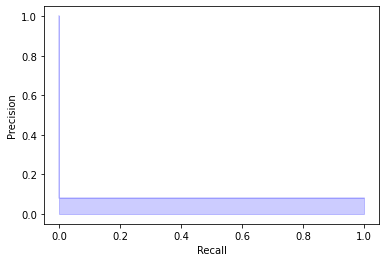

In [38]:
plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

Еще одной обобщающей характеристикой precision и recall является **average precision (AP)**, которая вычисляется как взвешенное среднее значений precision:
$$
AP = \sum_{n}{(R_n - R_{n-1})P_n},
$$
где $P_n$ и $R_n$ — precision и recall при $n$-ом отсечении. В некотором приближении значение AP есть значение иной характеристики, называемой **area under curve (AUC)** (площадь под кривой), являющейся важной метрикой при разработке классификаторов и детекторов.

## Задание 4.5.1

Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', затем избавьтесь от пропусков. Целевой переменной будет 'balance_due', разделите данные на обучающую и тестовую выборки в соотношении 70% / 30% без перемешивания. Обучите линейную регрессию из scikit-learn и запишите в переменную result значение метрики RMSE на тестовой выборке. RMSE означает Rooted Mean Squared Error. Rooted означает, что из значения метрики был взят корень.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
vis_data = pd.read_csv("./train1.csv", encoding = 'ISO-8859-1', low_memory = False)

In [45]:
vis_data = vis_data[[
    'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due'
]]

In [50]:
vis_data = vis_data.dropna()

In [56]:
X = vis_data.drop(['balance_due'], axis=1)
y = vis_data['balance_due']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, shuffle = False)

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)

In [66]:
result = np.sqrt(mean_squared_error(y_pred,y_test))

In [65]:
rmse

132.080334458986